In [129]:
import pandas as pd
READ = pd.read_excel('GALAMSEYDATASET.xlsx')
READ


,Sample,As (mg/L),Cd (mg/L),Cr (mg/L),Pb (mg/L),pH,TDS (mg/L),Conductivity (µS/cm),Hardness (mg/L),Ca Hardness (mg/L),Mg Hardness (mg/L)
0,River Oda,0.364,0.000,0.103,0.073,5.93,0.08,0.16,3.0,1.2,1.8
1,River Birim,0.372,0.000,0.037,0.065,5.96,0.05,0.10,2.4,1.0,1.4
2,River Pra Twifo,0.305,0.000,0.115,0.133,5.65,0.06,0.12,2.2,1.0,1.2
3,River Ankobra,0.221,0.000,0.293,0.119,5.70,0.06,0.12,1.6,0.7,0.9
4,River Subri,0.000,0.013,1.607,0.208,5.25,0.03,0.06,5.0,1.8,3.2
5,River Anuru,0.444,0.000,0.150,0.062,5.64,0.16,0.31,3.0,1.0,2.0
6,River Offin,0.216,0.000,0.411,0.148,6.46,0.14,0.29,3.0,1.2,1.8
7,River Ashrey,0.367,0.000,0.096,0.079,6.12,0.07,0.13,2.2,0.8,1.4
8,River Butre,0.341,0.000,0.147,0.066,5.67,0.05,0.10,4.2,2.0,2.2
9,River Tano,0.346,0.000,0.187,0.086,5.69,0.05,0.09,1.4,0.6,0.8


Pollutant Levels Across Rivers


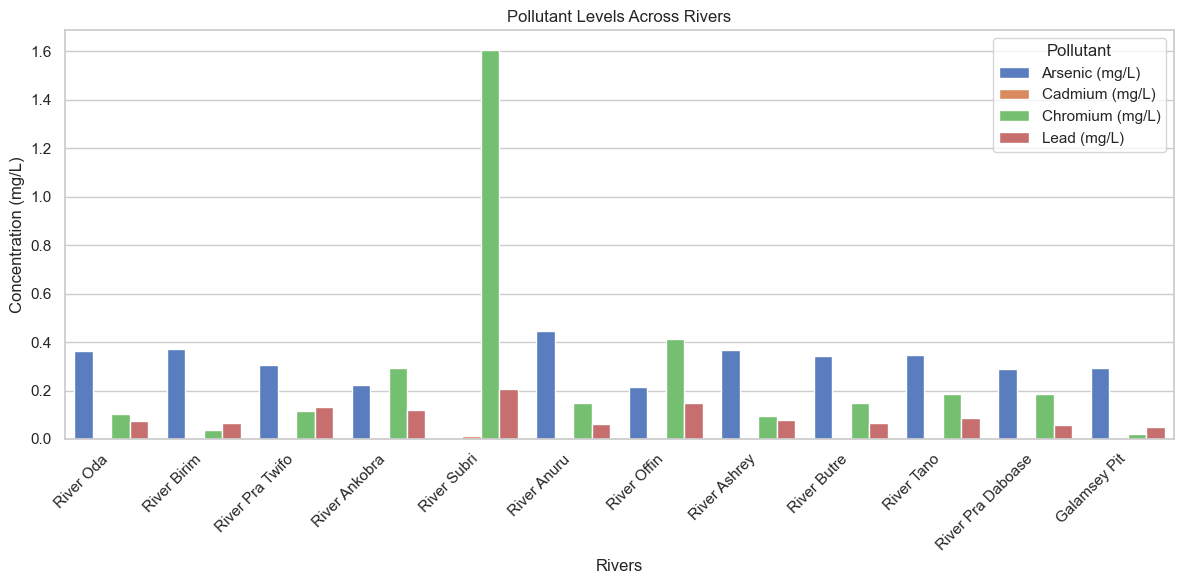

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


READ_renamed = READ.rename(columns={
    'As (mg/L)': 'Arsenic (mg/L)',
    'Cd (mg/L)': 'Cadmium (mg/L)',
    'Cr (mg/L)': 'Chromium (mg/L)',
    'Pb (mg/L)': 'Lead (mg/L)'
})


READ_melted = READ_renamed.melt(
    id_vars='Sample',
    value_vars=['Arsenic (mg/L)', 'Cadmium (mg/L)', 'Chromium (mg/L)', 'Lead (mg/L)'],
    var_name='Pollutant',
    value_name='Concentration'
)

plt.figure(figsize=(12, 6))
sns.barplot(x='Sample', y='Concentration', hue='Pollutant', data=READ_melted)


plt.title('Pollutant Levels Across Rivers')
plt.xlabel('Rivers')
plt.ylabel('Concentration (mg/L)')
plt.xticks(rotation=45, ha='right')

plt.savefig('Pollutant Levels Across Rivers.png')  # Saves as PNG image

plt.tight_layout()
plt.show()


## Pollutant Levels Across Rivers – Key Questions Answered

1. **Which rivers are the most polluted?**  
   This chart helps identify rivers with the **highest overall levels** of toxic substances such as **arsenic, cadmium, chromium, and lead**.

2. **Which river has the highest concentration of each pollutant?**  
   - **Arsenic**: Which river has the highest arsenic levels?  
   - **Cadmium**: Which river shows detectable levels of cadmium?  
   - **Chromium**: Which river is most affected by chromium pollution?  
   - **Lead**: Which river has the highest lead content?

3. **How do pollutant profiles differ from one river to another?**  
   The chart shows how **pollutant concentrations vary by river**, helping you compare **pollution sources** such as **illegal mining (galamsey), industrial discharge, or agricultural runoff**. This insight is crucial for **targeted environmental interventions**.


Pollutants Vs Who Limit Across Different Riverside 

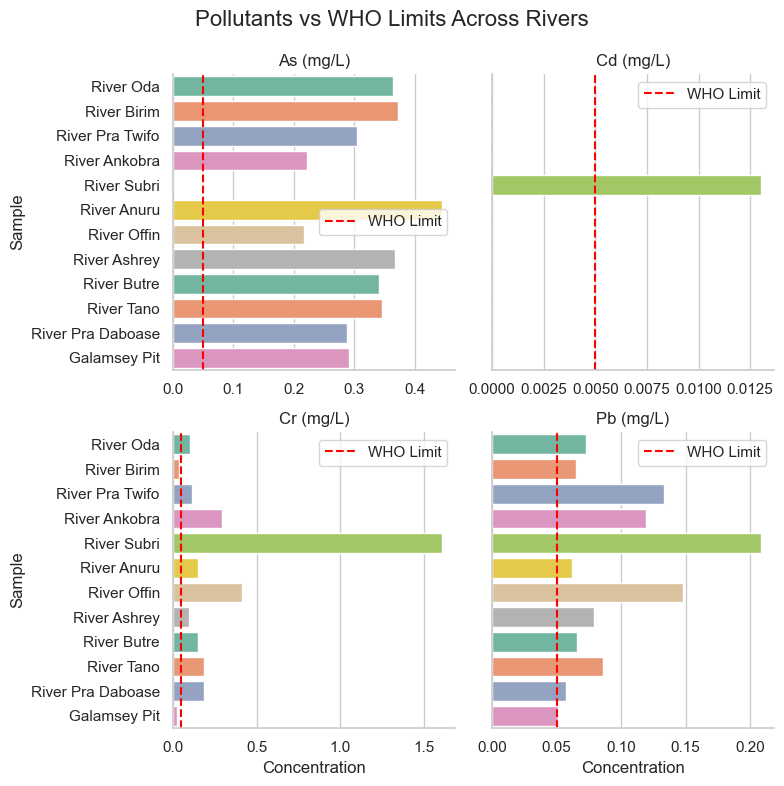

In [133]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

# If your data has been melted like this:
# melted = pd.melt(df, id_vars='Sample', value_vars=pollutants, var_name='Pollutant', value_name='Concentration')

# Make sure pollutants has the full column names
pollutants = ['As (mg/L)', 'Cd (mg/L)', 'Cr (mg/L)', 'Pb (mg/L)']

# WHO limits dictionary
who_limits = {
    'As': 0.05,
    'Cd': 0.005,
    'Cr': 0.05,
    'Pb': 0.05
}

# Plotting with FacetGrid
g = sns.FacetGrid(melted, col='Pollutant', col_wrap=2, height=4, sharex=False)
g.map_dataframe(sns.barplot, y='Sample', x='Concentration', palette='Set2', orient='h')

# Add WHO limit lines
for ax, pollutant in zip(g.axes.flat, pollutants):
    # Extract base pollutant name for dictionary lookup
    pollutant_key = pollutant.split()[0]  # e.g., 'As' from 'As (mg/L)'
    
    if pollutant_key in who_limits:
        limit = who_limits[pollutant_key]
        ax.axvline(limit, color='red', linestyle='--', label='WHO Limit')
    
    ax.set_title(pollutant)
    ax.legend()

# Title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Pollutants vs WHO Limits Across Rivers', fontsize=16)
plt.savefig('Pollutants vs WHO Limits Across Rivers')
plt.show()


## Vital Questions Answered by the Graph:

1. **Are any rivers exceeding the WHO recommended limits for heavy metals?**  
   The graph shows if the concentration bars exceed the red WHO limit line for each pollutant, indicating rivers that surpass the recommended limits.

2. **Which pollutants are the most concerning across all rivers?**  
   The graph reveals which pollutants consistently appear at higher concentrations across the rivers, highlighting the most problematic pollutants.

3. **Which pollutants fall within safe drinking water standards across all rivers?**  
   The rivers with bars not reaching the red WHO line indicate that those pollutants are within safe limits, helping to identify rivers where pollution is under control.


"Unraveling Relationships: Exploring the Correlations Between Water Quality Parameters"


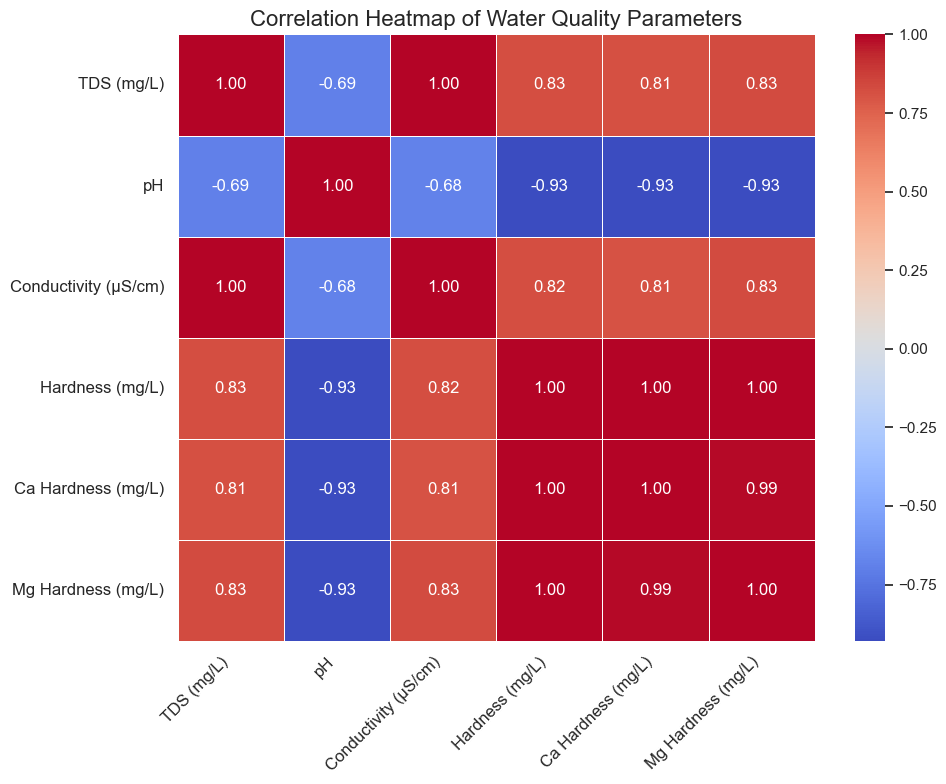

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_data = READ[['TDS (mg/L)', 'pH', 'Conductivity (µS/cm)', 'Hardness (mg/L)', 'Ca Hardness (mg/L)', 'Mg Hardness (mg/L)']]

# Calculate the correlation matrix
corr_matrix = correlation_data.corr()

# Set up the figure and size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Customize the plot
plt.title('Correlation Heatmap of Water Quality Parameters', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Show the plot
plt.tight_layout()
plt.savefig('Correlation Heatmap of Water Quality Parameters')
plt.show()


# Correlation Questions for Water Quality Parameters (Excluding Pollutants)

### 1. **Does pH correlate with TDS?**  
Can shifts in acidity/alkalinity affect the amount of dissolved solids in water?

### 2. **Is TDS strongly related to Conductivity?**  
Since both measure dissolved ions, are they directly proportional?

### 3. **Does pH influence water hardness?**  
Are harder waters (rich in Ca & Mg) more likely to be alkaline or acidic?

### 4. **Is there a link between Conductivity and Hardness?**  
Do higher ion concentrations (conductivity) reflect more Ca/Mg content?

### 5. **Does pH vary by geography?**  
Are there consistent pH patterns based on the river's location or region?


pH levels in Rivers Vs WHO GUIDELINES

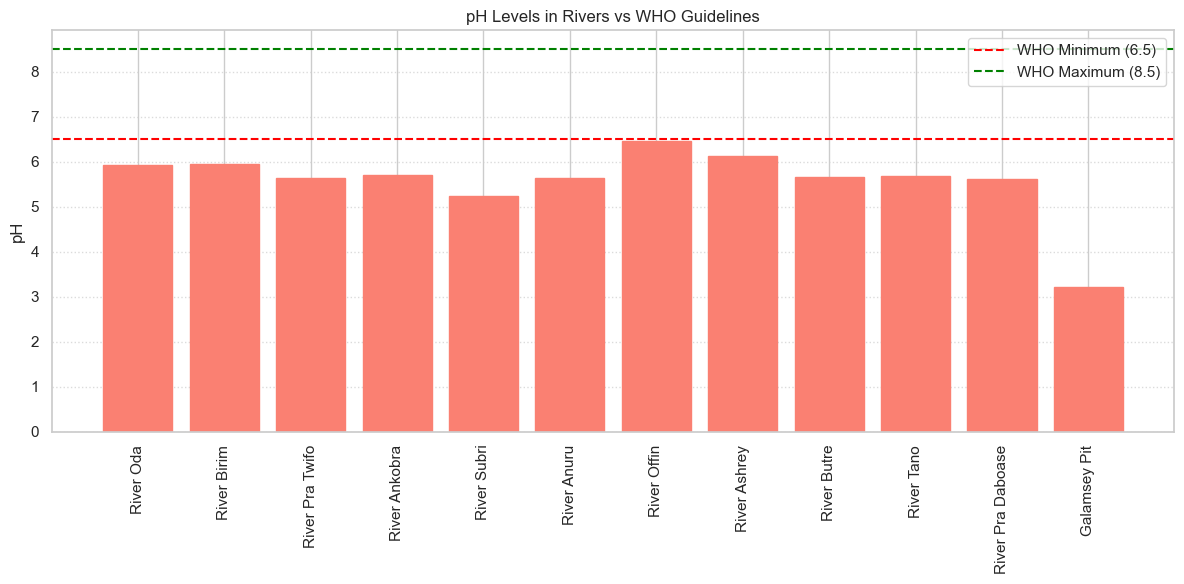

In [137]:
# Re-import necessary libraries after code execution state reset
import matplotlib.pyplot as plt
import pandas as pd

# Data from the user's table
data = {
    'Sample': [
        'River Oda', 'River Birim', 'River Pra Twifo', 'River Ankobra', 'River Subri',
        'River Anuru', 'River Offin', 'River Ashrey', 'River Butre', 'River Tano',
        'River Pra Daboase', 'Galamsey Pit'
    ],
    'pH': [5.93, 5.96, 5.65, 5.70, 5.25, 5.64, 6.46, 6.12, 5.67, 5.69, 5.62, 3.21]
}

df = pd.DataFrame(data)

# WHO pH range
who_min = 6.5
who_max = 8.5

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(df['Sample'], df['pH'], color='skyblue', edgecolor='black')
plt.axhline(y=who_min, color='red', linestyle='--', label='WHO Minimum (6.5)')
plt.axhline(y=who_max, color='green', linestyle='--', label='WHO Maximum (8.5)')

# Highlight bars that fall below WHO pH minimum
for bar, value in zip(bars, df['pH']):
    if value < who_min:
        bar.set_color('salmon')

plt.xticks(rotation=90)
plt.ylabel('pH')
plt.title('pH Levels in Rivers vs WHO Guidelines')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.savefig('pH Levels in Rivers vs WHO Guidelines')
plt.show()


### 📊 Vital Questions Answered by the Graph: *pH Levels in Rivers vs WHO Guidelines*

1. **Are the river pH levels within the WHO recommended range (6.5–8.5)?**  
   The graph clearly shows which rivers fall below the safe lower limit, indicating acidity.

2. **Which rivers have the most acidic water?**  
   Rivers like the **Galamsey Pit**, **River Subri**, and **River Pra Twifo** are visually highlighted for their significantly low pH levels.

3. **Are there any rivers approaching or exceeding alkalinity?**  
   The graph also allows for quick detection if any rivers are nearing or surpassing the upper safe limit (though in this case, none exceed 8.5).

4. **What is the overall trend in pH across rivers?**  
   The graph reveals a **general trend of acidic conditions**, which could suggest acid rain influence, industrial runoff, or mining pollution.

5. **Is immediate intervention needed?**  
   Rivers with pH significantly below 6.5 may require **mitigation or treatment** to prevent ecosystem and infrastructure damage.


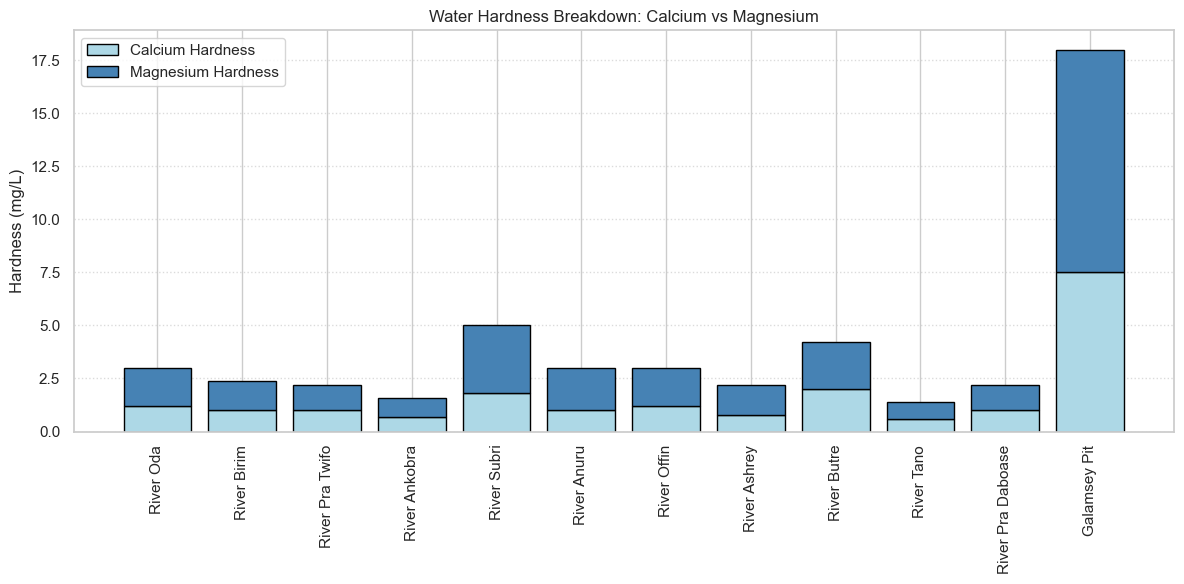

In [139]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (as provided earlier)
data = {
    'Sample': [
        'River Oda', 'River Birim', 'River Pra Twifo', 'River Ankobra', 'River Subri',
        'River Anuru', 'River Offin', 'River Ashrey', 'River Butre', 'River Tano',
        'River Pra Daboase', 'Galamsey Pit'
    ],
    'Ca Hardness (mg/L)': [1.2, 1.0, 1.0, 0.7, 1.8, 1.0, 1.2, 0.8, 2.0, 0.6, 1.0, 7.5],
    'Mg Hardness (mg/L)': [1.8, 1.4, 1.2, 0.9, 3.2, 2.0, 1.8, 1.4, 2.2, 0.8, 1.2, 10.5]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))
bar1 = plt.bar(df['Sample'], df['Ca Hardness (mg/L)'], label='Calcium Hardness', color='lightblue', edgecolor='black')
bar2 = plt.bar(df['Sample'], df['Mg Hardness (mg/L)'], bottom=df['Ca Hardness (mg/L)'], label='Magnesium Hardness', color='steelblue', edgecolor='black')

plt.xticks(rotation=90)
plt.ylabel('Hardness (mg/L)')
plt.title('Water Hardness Breakdown: Calcium vs Magnesium')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.savefig('Water Hardness Breakdown: Calcium vs Magnesium')
plt.show()


### 💧 **Questions Answered by the Graph:**

1. **What is the total water hardness for each river?**
   - The total height of each stacked bar reflects the total hardness level.

2. **How is the hardness distributed between calcium and magnesium?**
   - You can visually see which mineral contributes more to the overall hardness.

3. **Which rivers have the highest or lowest hardness levels?**
   - Helps identify rivers with potentially problematic or very soft water.

4. **Are any rivers dominated by one hardness component (Ca or Mg)?**
   - Useful for understanding the source of water hardness and potential treatment strategies.

5. **How do different rivers compare in terms of their hardness profile?**
   - Enables environmental or treatment-focused comparisons across locations.


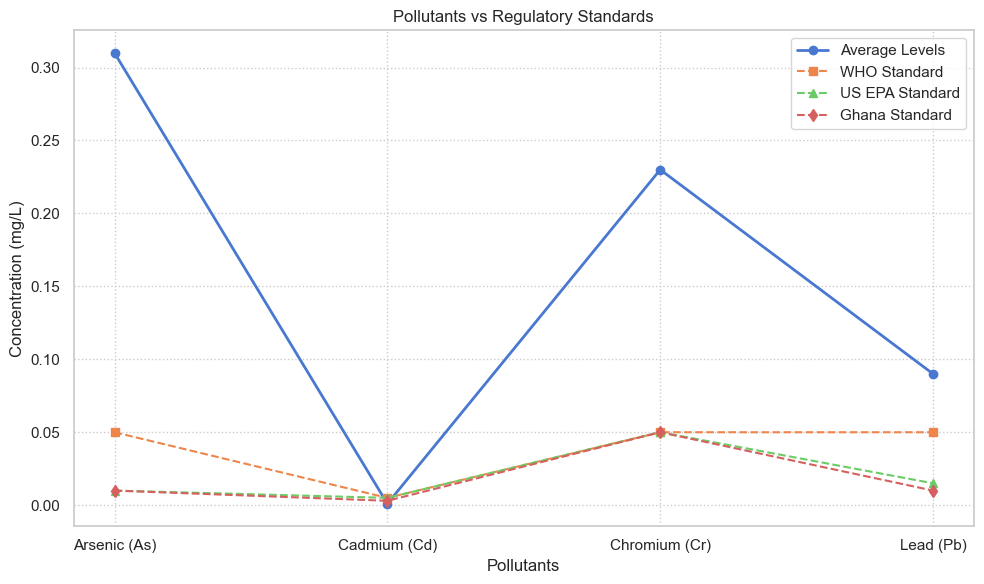

In [141]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (average pollutant levels from rivers)
avg_pollutants = {
    'Pollutant': ['Arsenic (As)', 'Cadmium (Cd)', 'Chromium (Cr)', 'Lead (Pb)'],
    'Average Levels': [0.31, 0.001, 0.23, 0.09],  # Sample averages from rivers
}

# Standards
standards = {
    'Pollutant': ['Arsenic (As)', 'Cadmium (Cd)', 'Chromium (Cr)', 'Lead (Pb)'],
    'WHO': [0.05, 0.005, 0.05, 0.05],
    'US EPA': [0.01, 0.005, 0.05, 0.015],
    'Ghana Std': [0.01, 0.003, 0.05, 0.01],  # Assumed for this context
}

# Convert to DataFrames
df_avg = pd.DataFrame(avg_pollutants)
df_standards = pd.DataFrame(standards)

# Merge data for plotting
df_plot = df_avg.merge(df_standards, on='Pollutant')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_plot['Pollutant'], df_plot['Average Levels'], marker='o', label='Average Levels', linewidth=2)
plt.plot(df_plot['Pollutant'], df_plot['WHO'], marker='s', linestyle='--', label='WHO Standard')
plt.plot(df_plot['Pollutant'], df_plot['US EPA'], marker='^', linestyle='--', label='US EPA Standard')
plt.plot(df_plot['Pollutant'], df_plot['Ghana Std'], marker='d', linestyle='--', label='Ghana Standard')

plt.title('Pollutants vs Regulatory Standards')
plt.ylabel('Concentration (mg/L)')
plt.xlabel('Pollutants')
plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('Pollutants vs Regulatory Standards')
plt.show()


# Key Questions from Pollutants vs Regulatory Standards Analysis

### 1. **Are any pollutant levels exceeding regulatory limits?**  
Helps identify which contaminants pose immediate health or environmental risks.

### 2. **Which pollutants most frequently exceed safe thresholds?**  
Prioritizes contaminants like arsenic or lead for urgent intervention.

### 3. **How do different water bodies compare in terms of compliance?**  
Reveals which rivers or sites are consistently above or below standards.

### 4. **Are existing regulations effective in protecting water quality?**  
Assesses if current standards are being met or frequently violated.

### 5. **What is the potential public health impact?**  
Highlights risks of long-term exposure when pollutants exceed safe levels.


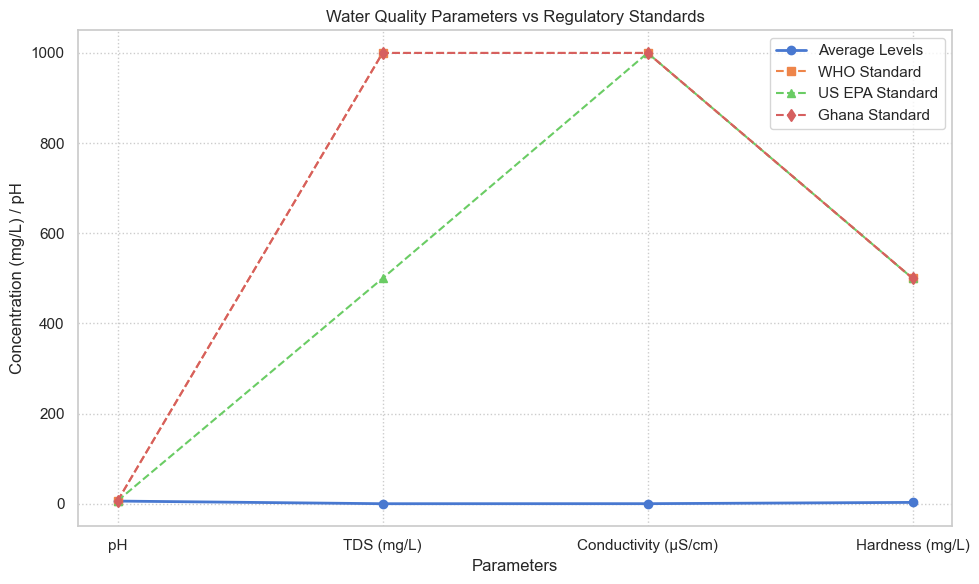

In [145]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (average values for parameters)
avg_parameters = {
    'Parameter': ['pH', 'TDS (mg/L)', 'Conductivity (µS/cm)', 'Hardness (mg/L)'],
    'Average Levels': [5.93, 0.08, 0.16, 3],  # Sample averages from rivers
}

# Standards
standards = {
    'Parameter': ['pH', 'TDS (mg/L)', 'Conductivity (µS/cm)', 'Hardness (mg/L)'],
    'WHO': [6.5, 1000, 1000, 500],
    'US EPA': [6.5, 500, 1000, 500],
    'Ghana Std': [6.5, 1000, 1000, 500],
}

# Convert to DataFrames
df_avg = pd.DataFrame(avg_parameters)
df_standards = pd.DataFrame(standards)

# Merge data for plotting
df_plot = df_avg.merge(df_standards, on='Parameter')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_plot['Parameter'], df_plot['Average Levels'], marker='o', label='Average Levels', linewidth=2)
plt.plot(df_plot['Parameter'], df_plot['WHO'], marker='s', linestyle='--', label='WHO Standard')
plt.plot(df_plot['Parameter'], df_plot['US EPA'], marker='^', linestyle='--', label='US EPA Standard')
plt.plot(df_plot['Parameter'], df_plot['Ghana Std'], marker='d', linestyle='--', label='Ghana Standard')

plt.title('Water Quality Parameters vs Regulatory Standards')
plt.ylabel('Concentration (mg/L) / pH')
plt.xlabel('Parameters')
plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('Water Quality Parameters vs Regulatory Standards')
plt.show()


# Key Questions from Water Quality Parameters vs Regulatory Standards

### 1. **Is the water safe for human consumption and use?**  
Determines if parameters like pH, TDS, and hardness meet drinking water standards.

### 2. **Which parameters exceed permissible levels?**  
Identifies issues such as excessive TDS or abnormal pH that could affect health or infrastructure.

### 3. **How do different water sources compare in quality?**  
Highlights which rivers or locations meet or fail to meet standard guidelines.

### 4. **Is there a risk to aquatic ecosystems or domestic use?**  
Assesses if physical-chemical conditions are suitable for aquatic life or household use.

### 5. **Are water treatment or policy interventions needed?**  
Helps decide where treatment, filtration, or regulation changes may be necessary.
